# **1. Perkenalan**

**Nama**    : **Ahmad Qais Alfiansyah**<br>
**Batch**   : **RMT-027**<br>
**Project** : **Graded Challenge 4**<br>

<hr>

## **Latar Belakang Masalah**
<p> Moda Transportasi sudah diibaratkan sebagai sebuah kebutuhan primer saat ini. Apapun kesibukan, berapapun usia, bagaimanapun kondisi ekonomi semuanya membutuhkan moda transportasi<br><br>
Di era yang semua serba digital saat ini, transportasi bukan hanya bercerita tentang sebuah kendaraan yang bisa memindahkan object berupa manusia ataupun benda dari tempat asal ke tempat tujuan. Lebih dari itu, sistem komunikasi hadir memudahkan siapapun dalam emangakses teknologi. Maka tak jarang banyak perusahaan yang notabene bukan sebuah perusahaan transportasi hadir memenuhi kebutuhan dasar ini.</p>
<b>Objekif</b><br>
<p>Saya mempunyai dataset besar yang bersisi riwayat perjalanan konsumen moda transportasi dari platform digital bernama Uber dan Lyft yang akan saya gunakan sebagai dasar saya memperhitungkan biaya transportasi tim sales saya melakukan sales call. Saya akan mencari tahu faktor-faktor apa yang menjadi pengaruh dari harga layanan.</p>
Selain itu saya juga bisa memprediksi perkiraan biaya transportasi dari lokasi ke lokasi berdasarkan kebutuhan tim sales dengan model regresi linear yang saya susun</p>

# **2. Import Libraries**

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import preprocessing

import pickle

# **3. Data Loading**

### Read file csv

In [178]:
df = pd.read_csv('rideshare_kaggle.csv')


## Cek dataset
Cek dataset dengan menggunakan keyword .info() untuk mendapatkan gambaran umum tentang dataset

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

**Insight**
<p>Dari informasi di atas, diketahui bahwa dataset berukuran sangat besar dengan detail sebagai berikut:<br>
 <li> Jumlah baris sebanyak <b>lebih dari 600 ribu baris</b> </li>
 <li> Jumlah kolom sebanyak <b>lebih dari 57 kolom</b> </li>
 <li> Sejauh ini terlihat, bahwa hanya <b>kolom Price</b> yang memiliki Non-Count berbeda dari jumlah baris. Ini menandakan ada Missing Value pada kolom Price. Sehingga saya akan lebih dalami lagi dan mengekskusinya pada tahap Future Engineering.</li>
 <li> Tahap selanjutnya saya akan mencoba menggunakan keyword <i>display.max_columns</i> untuk menampilkan semua kolom agar kolom yang berada di tengah tidak tersembunyi by default.</li>
 </p>

## **Memaksimalkan Tampilan Kolom Dataset**

In [180]:
# Memaksimalkan Kolom
pd.set_option('display.max_columns', None)
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


**Insight:**
<p>Kolom sudah berhasil ditampilkan secara maksimal. Terlihat secara logika, banyak kolom-kolom yang tidak memiliki kaitan langsung dengan target yaitu Kolom Price, Seperti misalkan ID, timestamp dll.
</p>

### **Menggati Nama Kolom**

In [181]:
rename_col = {
    'hour'          : 'time',
    'source'        : 'origin_point',
    'name'          : 'product_name',
    'short_summary' : 'weather'
}

df.rename(columns= rename_col, inplace=True)
df.head()

,id,timestamp,time,day,month,datetime,timezone,origin_point,destination,cab_type,product_id,product_name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,weather,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


## **Drop Kolom Tahap 1**
<p>Seperti yang kita tahu bahwa dataset memiliki kolom dan baris yang sanget besar. Sehingga, alangkah lebih baik menurut saya tabel-tabel yang sekiranya tidak memiliki relevansi dengan kolom target dalam hal ini adalah Price dihapus dari awal.<br>
Saya akan mulai dengan memecah kolom berdasarkan jenisnya.

In [182]:
cat_col = df.select_dtypes(include=['object'])
print(f"Berikut adalah kolom-kolom dengan tipe data object (string):\n{cat_col.nunique()}")

Berikut adalah kolom-kolom dengan tipe data object (string):
id              693071
datetime         31350
timezone             1
origin_point        12
destination         12
cab_type             2
product_id          13
product_name        13
weather              9
long_summary        11
icon                 7
dtype: int64


<p>Dari sini saya akan hapus kolom-kolom di bawah ini yang secara logika tidak mempengaruhi Price:
    <li>Id</li>
    <li>Datetime (redundant)</li>
    <li>Timezone</li>
    <li>product_id</li>
    <li>long_summary</li>
    <li>icon</li>
</p>

Eksekusi penghapusan kolom

In [183]:
df.drop(['id', 'datetime', 'timezone', 'product_id', 'long_summary', 'icon'], axis = 1, inplace = True)
cat_col = df.select_dtypes(include=['object'])
print(f"Kolom-kolon tersebut sudah dihapus. Berikut adalah kolom-kolom yang ada sekarang untuk tipe data string (object):\n{cat_col.nunique()}")

Kolom-kolon tersebut sudah dihapus. Berikut adalah kolom-kolom yang ada sekarang untuk tipe data string (object):
origin_point    12
destination     12
cab_type         2
product_name    13
weather          9
dtype: int64


Saya akan membagi pengecekan menjadi 2 tahap. Pertama tahap Kolom berjenis INT, dan terakhir FLOAT

### Kolom berjenis **Numerik (Interger)**

In [184]:
int_col = df.select_dtypes(include=['int'])
print(f"Berikut adalah kolom-kolom dengan tipe data interger:\n{int_col.nunique()}")

Berikut adalah kolom-kolom dengan tipe data interger:
time                            24
day                             17
month                            2
windGustTime                    25
temperatureHighTime             23
temperatureLowTime              31
apparentTemperatureHighTime     27
apparentTemperatureLowTime      32
windBearing                    195
uvIndex                          3
sunriseTime                    110
sunsetTime                     114
uvIndexTime                     20
temperatureMinTime              25
temperatureMaxTime              23
apparentTemperatureMinTime      29
apparentTemperatureMaxTime      27
dtype: int64


<p>Dari sini saya akan hapus kolom-kolom di bawah ini yang secara logika tidak mempengaruhi Price:
    <li>windGustTime</li>
    <li>temperatureHighTime</li>
    <li>temperatureLowTime</li>
    <li>apparentTemperatureHighTime</li>
    <li>apparentTemperatureLowTime</li>
    <li>windBearing</li>
    <li>sunriseTime</li>
    <li>sunsetTime</li>
    <li>uvIndexTime</li>
    <li>temperatureMinTime</li>
    <li>temperatureMaxTime</li>
    <li>apparentTemperatureMinTime</li>
    <li>apparentTemperatureMaxTime</li>
</p>

</p>

Eksekusi penghapusan kolom

In [185]:
df.drop(['windGustTime',
         'temperatureHighTime',
         'temperatureLowTime',
         'apparentTemperatureHighTime',
         'apparentTemperatureLowTime',
         'windBearing',
         'sunriseTime',
         'sunsetTime',
         'uvIndexTime',
         'temperatureMinTime',
         'temperatureMaxTime',
         'apparentTemperatureMinTime',
         'apparentTemperatureMaxTime'
         ], axis = 1, inplace = True)
int_col = df.select_dtypes(include=['int'])
print(f"Kolom-kolon tersebut sudah dihapus. Berikut adalah kolom-kolom yang ada sekarang untuk tipe data interger:\n{int_col.nunique()}")

Kolom-kolon tersebut sudah dihapus. Berikut adalah kolom-kolom yang ada sekarang untuk tipe data interger:
time       24
day        17
month       2
uvIndex     3
dtype: int64


### Kolom berjenis **Numerik (Float)**

Untuk tipe data ini, karena jumlah kolom sangat banyak, maka saya akan membagi lagi menjadi 2 tahap supaya lebih fokus dan berhati-hati dalam meilih kolom yang akan dihapus. Pembagiannya adalah sebagai berikut:
<li> Tahap 1: 15 kolo, pertama diurut dari jumlah value unik terbesar</li>
<li> Tahap 2: Sisa kolomnya juga diurutdari jumlah value unik terbesar</li>

In [186]:
# Split kolo-kolom menjadi 2 bagian pada 2 variabel berbeda
float_col = df.select_dtypes(include=['float'])
float_col_1 = float_col.nunique().sort_values(ascending=False).head(15)
float_col_2 = float_col.nunique().sort_values(ascending=False).tail(15)

In [187]:
print(f"Berikut adalah 15 kolom pertama dengan tipe data float:\n{float_col_1.sort_values(ascending=False)}")

Berikut adalah 15 kolom pertama dengan tipe data float:
timestamp                 36179
distance                    549
apparentTemperature         319
pressure                    316
dewPoint                    313
temperature                 308
windSpeed                   291
windGust                    286
ozone                       274
visibility                  227
visibility.1                227
price                       147
apparentTemperatureMin      137
apparentTemperatureLow      136
temperatureLow              133
dtype: int64


In [188]:
print(f"Berikut adalah 15 kolom kedua dengan tipe data float:\n{float_col_2.sort_values(ascending=False)}")

Berikut adalah 15 kolom kedua dengan tipe data float:
temperatureLow             133
temperatureMin             131
temperatureHigh            129
temperatureMax             128
apparentTemperatureMax     125
apparentTemperatureHigh    124
cloudCover                  83
precipIntensityMax          65
precipIntensity             63
humidity                    51
precipProbability           29
moonPhase                   18
longitude                   12
latitude                    11
surge_multiplier             7
dtype: int64


Berikut adalah yang secara logika tidak akan ada hubungan dengan Price:
<li>timestamp</li>
<li>pressure</li>
<li>dewPoint</li>
<li>ozone</li>
<li>visibility.1</li>
<li>apparentTemperatureMin</li>
<li>apparentTemperatureLow</li>
<li>temperatureLow</li>
<li>temperatureHigh</li>
<li>temperatureMax</li>
<li>apparentTemperatureMax</li>
<li>apparentTemperatureHigh</li>
<li>cloudCover</li>
<li>precipIntensityMax</li>
<li>precipIntensity</li>
<li>humidity</li>
<li>longitude</li>
<li>latitude</li>

Eksekusi penghapusan kolom

In [189]:
df.drop(['timestamp',
         'pressure',
         'dewPoint',
         'ozone',
         'visibility.1',
         'apparentTemperatureMin',
         'apparentTemperatureLow',
         'temperatureLow',
         'temperatureHigh',
         'temperatureMax',
         'apparentTemperatureMax',
         'apparentTemperatureHigh',
         'cloudCover',
         'precipIntensityMax',
         'precipIntensity',
         'humidity',
         'longitude',
         'latitude',
         ], axis = 1, inplace = True)
float_col = df.select_dtypes(include=['float'])
print('Kolom-kolom berhasil dihapus, dan berikut adalah gambaran umum dataset sekarang setelah menghapus beberapa kolom:\n')
print(df.info())

Kolom-kolom berhasil dihapus, dan berikut adalah gambaran umum dataset sekarang setelah menghapus beberapa kolom:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 693071 non-null  int64  
 1   day                  693071 non-null  int64  
 2   month                693071 non-null  int64  
 3   origin_point         693071 non-null  object 
 4   destination          693071 non-null  object 
 5   cab_type             693071 non-null  object 
 6   product_name         693071 non-null  object 
 7   price                637976 non-null  float64
 8   distance             693071 non-null  float64
 9   surge_multiplier     693071 non-null  float64
 10  temperature          693071 non-null  float64
 11  apparentTemperature  693071 non-null  float64
 12  weather              693071 non-null  object 
 13  prec

## **Hapus Whitespace**

In [190]:
for column in df.columns:
    df[column] = df[column].map(lambda x: x.strip() if isinstance(x, str) else x)

# **4. Exploratory Data Analysis (EDA)**

## **Check Missing Value**

In [191]:
missing_val = df.isna().sum()
missing_val[missing_val > 0]

price    55095
dtype: int64

Terlihat bahwa hanya ada 1 kolom yaitu kolom Price yang terdapat nilai hilang. Selanjut kita cek apakah ada pola dalam nilai-nilai yang hilang tersetut

In [192]:
missing = df[df.price.isnull()]
missing

,time,day,month,origin_point,destination,cab_type,product_name,price,distance,surge_multiplier,temperature,apparentTemperature,weather,precipProbability,windSpeed,windGust,visibility,uvIndex,moonPhase,temperatureMin
18,14,1,12,North End,West End,Uber,Taxi,NaN,1.11,1.0,36.99,32.27,Partly Cloudy,0.0,5.87,6.26,9.910,1,0.82,31.71
31,23,2,12,Beacon Hill,South Station,Uber,Taxi,NaN,2.48,1.0,48.83,48.83,Overcast,0.0,2.83,2.98,7.790,0,0.86,36.45
40,20,29,11,North Station,Fenway,Uber,Taxi,NaN,2.94,1.0,42.50,36.47,Partly Cloudy,0.0,10.68,17.15,9.772,0,0.75,35.15
60,20,13,12,North End,West End,Uber,Taxi,NaN,1.16,1.0,33.15,30.60,Mostly Cloudy,0.0,3.02,3.02,9.956,0,0.21,18.29
69,13,30,11,North End,Beacon Hill,Uber,Taxi,NaN,2.67,1.0,31.80,31.80,Clear,0.0,2.10,4.79,10.000,0,0.79,28.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693025,15,15,12,South Station,Beacon Hill,Uber,Taxi,NaN,2.50,1.0,50.71,50.71,Mostly Cloudy,0.0,3.55,4.79,9.909,1,0.27,39.68
693047,1,29,11,Haymarket Square,Beacon Hill,Uber,Taxi,NaN,0.91,1.0,38.42,32.45,Mostly Cloudy,0.0,8.41,11.54,9.915,0,0.72,33.85
693049,1,29,11,North End,Beacon Hill,Uber,Taxi,NaN,1.79,1.0,38.42,32.45,Mostly Cloudy,0.0,8.41,11.54,9.915,0,0.72,33.85
693060,5,2,12,Theatre District,Haymarket Square,Uber,Taxi,NaN,1.61,1.0,38.19,38.19,Overcast,0.0,2.07,3.50,9.698,0,0.86,36.32


Insight : Sekilas, saya berpendapat ada kemiripan Pola pada kolom cab_type dan product_name yaitu Uber dan Taxi. Saya akan spesifik pada value Taxi sebagai lingkup yang lebih kecil dari cab_type. Apakah semua data hilang berasal dari product_name = Taxi?

In [193]:
missing_taxi = missing[missing['product_name'] == 'Taxi']
len(missing_taxi)

55095

Ternyata benar, bahwa semua kolom yang ada pada data missing semuanya memiliki product_name = Taxi. Saya akan lanjutkan melalui sabuah visualisasi

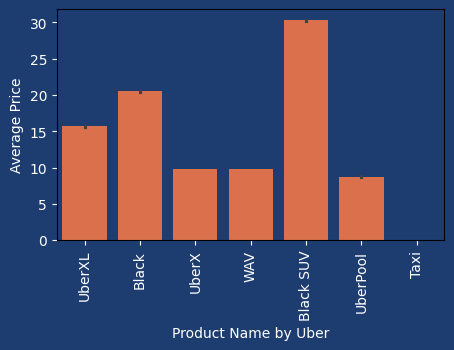

Gambaran Statistika dari Produk Uber:

                count       mean       std   min   25%   50%   75%   max
product_name                                                            
Black         55095.0  20.523786  4.952030  13.5  16.0  19.5  23.5  68.5
Black SUV     55096.0  30.286763  4.836097  23.0  27.0  28.5  32.5  89.5
Taxi              0.0        NaN       NaN   NaN   NaN   NaN   NaN   NaN
UberPool      55091.0   8.752500  2.106251   4.5   7.5   8.5  10.0  42.5
UberX         55094.0   9.765074  2.465101   6.0   8.0   9.5  10.5  44.0
UberXL        55096.0  15.678144  4.523876   8.0  12.5  15.0  17.5  76.0
WAV           55096.0   9.765019  2.465085   6.0   8.0   9.5  10.5  44.0


In [194]:
a = df[df['cab_type']== 'Uber']

plt.figure(figsize=(5, 3), facecolor='#1D3D71')
ax= sns.barplot(data = a, x= 'product_name', y= 'price', color='#F26634')
ax.set_facecolor('#1D3D71')
plt.tick_params(axis='x', colors='white', rotation=90)
plt.tick_params(axis='y', colors='white')
plt.xlabel('Product Name by Uber', color= 'white')
plt.ylabel('Average Price', color= 'white')
plt.show()

print(f"Gambaran Statistika dari Produk Uber:\n\n{a.groupby('product_name')['price'].describe()}")

Terlihat bahwa sebenarnya cab_type Uber memiliki turunan product_name salah satunya Taxi. Langkah selanjut adalah mengambil keputusan apakah baiknya observasi yang terdapat taxi dihapus atau dilakukan Imputasi? Jika dihapus menurut saya, model akan kurang responsive dengan dataset realnya.

Maka saya putuskan, saya akan imputasi nilai Price dari product_name Taxi dengan mengambil Harga Rata-Rata dari product serupa yang secara realita tidak memiliki perbedaan harga yang signifikan dalam hal ini adalah Uber X atau WAV yang sama-sama memiliki rata-rata sebesar 9.76. 

### Imputasi Data

In [195]:
uberX_mean= df[df['product_name']== 'UberX']['price'].mean()
df['price'].fillna(uberX_mean, inplace= True)
df.isna().sum()

time                   0
day                    0
month                  0
origin_point           0
destination            0
cab_type               0
product_name           0
price                  0
distance               0
surge_multiplier       0
temperature            0
apparentTemperature    0
weather                0
precipProbability      0
windSpeed              0
windGust               0
visibility             0
uvIndex                0
moonPhase              0
temperatureMin         0
dtype: int64

## **Statistika Deskriptif**

### **Cek Variasi Data**

In [196]:
cat_col.describe().transpose()

,count,unique,top,freq
origin_point,693071,12,Financial District,58857
destination,693071,12,Financial District,58851
cab_type,693071,2,Uber,385663
product_name,693071,13,UberXL,55096
weather,693071,9,Overcast,218895


**Insight**:<br><br>
Asal dan Tujuan Populer: **"Financial District"** adalah titik asal dan tujuan yang paling sering, dengan masing-masing muncul sebanyak 58,857 dan 58,851 kali. Mungkin menurut pandangan saya, Financial District adalah pusat perkantoran, dengan demand tinggi untuk layanan transportasi.

Preferensi Cab Type dengan nama produk yang sering muncul adalah UberXL

Kondisi Cuaca: "Overcast" (berawan)

In [197]:
num_col = df.select_dtypes(include=['int', 'float'])
num_col.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
time,693071.0,11.62,6.95,0.00,6.00,12.00,18.00,23.00
day,693071.0,17.79,9.98,1.00,13.00,17.00,28.00,30.00
month,693071.0,11.59,0.49,11.00,11.00,12.00,12.00,12.00
price,693071.0,16.01,9.13,2.50,9.50,13.50,22.50,97.50
distance,693071.0,2.19,1.14,0.02,1.28,2.16,2.92,7.86
surge_multiplier,693071.0,1.01,0.09,1.00,1.00,1.00,1.00,3.00
temperature,693071.0,39.58,6.73,18.91,36.45,40.49,43.58,57.22
apparentTemperature,693071.0,35.88,7.92,12.13,31.91,35.90,40.08,57.22
precipProbability,693071.0,0.15,0.33,0.00,0.00,0.00,0.00,1.00
windSpeed,693071.0,6.19,3.15,0.45,3.41,5.91,8.41,15.00


**Insight:**<br><br>
Berdasarkan data di atas, terlihat bahwa rata2 durasi perjalanan adalah 11 menit dengan standarndeviasi 7 menit. Artinya variasi durasi bisa dibikang tinggi. 

Hal serupa juga terjadi pada Harga rata2 sebesar 16,5 dengan SD sebesar 9. 

Menurut saya, jarak tempuh perjalanan relatif pendek dimana terjauhnya sejauh 8km

### **Average Price Over Hour**

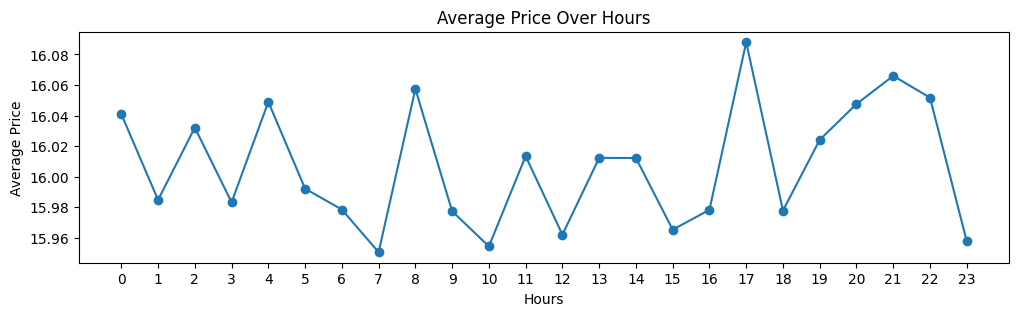

In [198]:
time_series_data = df.groupby(['time'])['price'].mean()

time_series_data.plot(marker='o', linestyle='-', figsize=(12, 3))
plt.xticks(df['time'].unique())
plt.xlabel('Hours')
plt.ylabel('Average Price')
plt.title('Average Price Over Hours')
plt.show()

**Insight** : Rata-rata harga tinggi berada di jam 8 pagi, 5 sore, dan jam 7 sampai 10 malam. Sedangkan, rata-rata harga rendah berada di jam 7 pagi dan 12 siang

### **Average Price Over Distance**

In [199]:
df.select_dtypes(include='float').columns

Index(['price', 'distance', 'surge_multiplier', 'temperature',
       'apparentTemperature', 'precipProbability', 'windSpeed', 'windGust',
       'visibility', 'moonPhase', 'temperatureMin'],
      dtype='object')

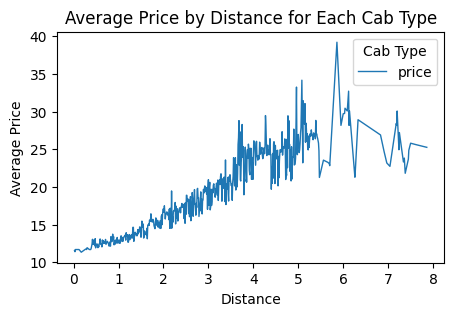

In [200]:
cab_type_grouped = df.groupby(['distance'])['price'].mean()
cab_type_grouped
cab_type_grouped.plot(figsize=(5, 3), linewidth=1)
plt.title('Average Price by Distance for Each Cab Type')
plt.ylabel('Average Price')
plt.xlabel('Distance')
plt.legend(title='Cab Type')
plt.show()

**Insight** : Terlihat jarak berkorelasi positif dengan rata-rata harga

# **5. Feature Engineering**

### Check Cardinality

In [201]:
for column in cat_col:
    cardinality = df[column].nunique()
    print(f"Cardinality untuk kolom '{column}': {cardinality}")

Cardinality untuk kolom 'origin_point': 12
Cardinality untuk kolom 'destination': 12
Cardinality untuk kolom 'cab_type': 2
Cardinality untuk kolom 'product_name': 13
Cardinality untuk kolom 'weather': 9


Insight :
- cab_type column yang masuk kategori Low Cardinality karena hanya memiliki 2 nilai unik
- origin_point, destination, product_name, dan weather masuk kategori High Cardinality karena memiliki banyak nilai unik

###  Label Encoding

In [202]:
encode = LabelEncoder()

column = ['cab_type', 'weather']
for col in column:
    df[col] = encode.fit_transform(df[col])
    
df

,time,day,month,origin_point,destination,cab_type,product_name,price,distance,surge_multiplier,temperature,apparentTemperature,weather,precipProbability,windSpeed,windGust,visibility,uvIndex,moonPhase,temperatureMin
0,9,16,12,Haymarket Square,North Station,0,Shared,5.000000,0.44,1.0,42.34,37.12,4,0.0,8.66,9.17,10.000,0,0.30,39.89
1,2,27,11,Haymarket Square,North Station,0,Lux,11.000000,0.44,1.0,43.58,37.35,8,1.0,11.98,11.98,4.786,0,0.64,40.49
2,1,28,11,Haymarket Square,North Station,0,Lyft,7.000000,0.44,1.0,38.33,32.93,0,0.0,7.33,7.33,10.000,0,0.68,35.36
3,4,30,11,Haymarket Square,North Station,0,Lux Black XL,26.000000,0.44,1.0,34.38,29.63,0,0.0,5.28,5.28,10.000,0,0.75,34.67
4,3,29,11,Haymarket Square,North Station,0,Lyft XL,9.000000,0.44,1.0,37.44,30.88,6,0.0,9.14,9.14,10.000,0,0.72,33.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,23,1,12,West End,North End,1,UberXL,13.000000,1.00,1.0,37.05,37.05,6,0.0,2.34,2.87,9.785,0,0.82,31.42
693067,23,1,12,West End,North End,1,UberX,9.500000,1.00,1.0,37.05,37.05,6,0.0,2.34,2.87,9.785,0,0.82,31.42
693068,23,1,12,West End,North End,1,Taxi,9.765074,1.00,1.0,37.05,37.05,6,0.0,2.34,2.87,9.785,0,0.82,31.42
693069,23,1,12,West End,North End,1,Black SUV,27.000000,1.00,1.0,37.05,37.05,6,0.0,2.34,2.87,9.785,0,0.82,31.42


Label Encoding digunakan karena proses ini lebih sederhana dan mudah diimplementasikan.

### Find Outliers

In [203]:
def find_outliers(dataframe, column):
    # Hitung IQR
    Q1 = np.percentile(dataframe[column],25)
    Q3 = np.percentile(dataframe[column],75)
    IQR = Q3 - Q1

    # Tentukan Batas Atas dan Bawah
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return upper_bound, lower_bound

Membuat sebuah function find outliers untuk mencari batas atas dan batas bawah outliers

In [204]:
price_upper, price_lower = find_outliers(df, 'price')
distance_upper, distance_lower = find_outliers(df, 'distance')
temperature_upper, temperature_lower = find_outliers(df, 'temperature')


print(f"Batas atas Price : {price_upper} dan Batas bawah Price : {price_lower}")
print(f"Batas atas Distance : {distance_upper} dan Batas bawah Distance : {distance_lower}")
print(f"Batas atas Temperature : {temperature_upper} dan Batas bawah Temperature : {temperature_lower}")

Batas atas Price : 42.0 dan Batas bawah Price : -10.0
Batas atas Distance : 5.38 dan Batas bawah Distance : -1.18
Batas atas Temperature : 54.27499999999999 dan Batas bawah Temperature : 25.75500000000001


### Remove Outlier

In [205]:
df = df[(df['price'] >= price_lower) & (df['price'] <= price_upper)]
df

,time,day,month,origin_point,destination,cab_type,product_name,price,distance,surge_multiplier,temperature,apparentTemperature,weather,precipProbability,windSpeed,windGust,visibility,uvIndex,moonPhase,temperatureMin
0,9,16,12,Haymarket Square,North Station,0,Shared,5.000000,0.44,1.0,42.34,37.12,4,0.0,8.66,9.17,10.000,0,0.30,39.89
1,2,27,11,Haymarket Square,North Station,0,Lux,11.000000,0.44,1.0,43.58,37.35,8,1.0,11.98,11.98,4.786,0,0.64,40.49
2,1,28,11,Haymarket Square,North Station,0,Lyft,7.000000,0.44,1.0,38.33,32.93,0,0.0,7.33,7.33,10.000,0,0.68,35.36
3,4,30,11,Haymarket Square,North Station,0,Lux Black XL,26.000000,0.44,1.0,34.38,29.63,0,0.0,5.28,5.28,10.000,0,0.75,34.67
4,3,29,11,Haymarket Square,North Station,0,Lyft XL,9.000000,0.44,1.0,37.44,30.88,6,0.0,9.14,9.14,10.000,0,0.72,33.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,23,1,12,West End,North End,1,UberXL,13.000000,1.00,1.0,37.05,37.05,6,0.0,2.34,2.87,9.785,0,0.82,31.42
693067,23,1,12,West End,North End,1,UberX,9.500000,1.00,1.0,37.05,37.05,6,0.0,2.34,2.87,9.785,0,0.82,31.42
693068,23,1,12,West End,North End,1,Taxi,9.765074,1.00,1.0,37.05,37.05,6,0.0,2.34,2.87,9.785,0,0.82,31.42
693069,23,1,12,West End,North End,1,Black SUV,27.000000,1.00,1.0,37.05,37.05,6,0.0,2.34,2.87,9.785,0,0.82,31.42


### Check correlation

Menghapus column yang memiliki korelasi yang sangat rendah terhadap column price

### Check Correlation

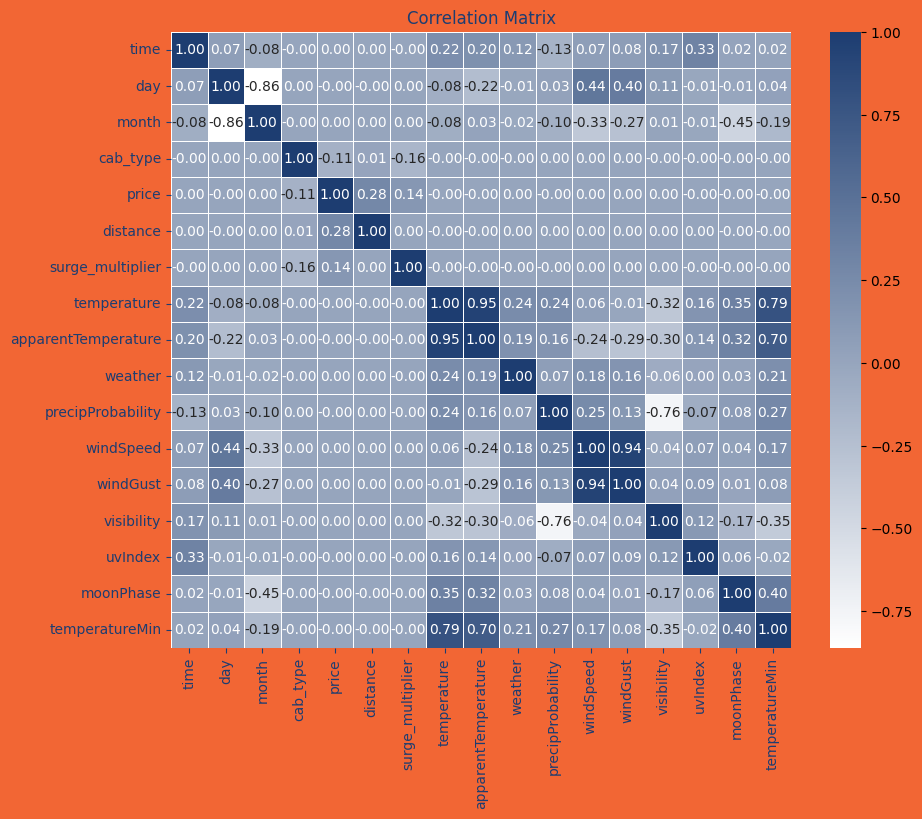

In [206]:
colors = ["white", "#1D3D71"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# Membuat heatmap
plt.figure(figsize=(10, 8), facecolor= "#F26634")
ax = sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt='.2f', linewidths=.5)

# Mengatur warna latar belakang axes
ax.set_facecolor('#1D3D71')

# Mengatur judul
plt.title('Correlation Matrix', color='#1D3D71')

# Mengatur warna label sumbu x dan y dan ticks
ax.set_xlabel(ax.get_xlabel(), color='#1D3D71')
ax.set_ylabel(ax.get_ylabel(), color='#1D3D71')

# Mengatur warna tick labels pada sumbu x dan y
ax.tick_params(axis='x', colors='#1D3D71')
ax.tick_params(axis='y', colors='#1D3D71')

# Menampilkan plot
plt.show()


In [207]:
correlation_matrix[correlation_matrix['price'] > 0.01]['price'].sort_values(ascending=False)

price               1.000000
distance            0.284771
surge_multiplier    0.135806
Name: price, dtype: float64

Insight : Column yang memiliki korelasi yang cukup tinggi terhadap column price adalah column `distance` dan column `surge_multiplier`

# **6. Model Definition**

### X y Definition

In [208]:
X = df.drop(['price'], axis = 1)
y = df['price']
X

,time,day,month,origin_point,destination,cab_type,product_name,distance,surge_multiplier,temperature,apparentTemperature,weather,precipProbability,windSpeed,windGust,visibility,uvIndex,moonPhase,temperatureMin
0,9,16,12,Haymarket Square,North Station,0,Shared,0.44,1.0,42.34,37.12,4,0.0,8.66,9.17,10.000,0,0.30,39.89
1,2,27,11,Haymarket Square,North Station,0,Lux,0.44,1.0,43.58,37.35,8,1.0,11.98,11.98,4.786,0,0.64,40.49
2,1,28,11,Haymarket Square,North Station,0,Lyft,0.44,1.0,38.33,32.93,0,0.0,7.33,7.33,10.000,0,0.68,35.36
3,4,30,11,Haymarket Square,North Station,0,Lux Black XL,0.44,1.0,34.38,29.63,0,0.0,5.28,5.28,10.000,0,0.75,34.67
4,3,29,11,Haymarket Square,North Station,0,Lyft XL,0.44,1.0,37.44,30.88,6,0.0,9.14,9.14,10.000,0,0.72,33.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,23,1,12,West End,North End,1,UberXL,1.00,1.0,37.05,37.05,6,0.0,2.34,2.87,9.785,0,0.82,31.42
693067,23,1,12,West End,North End,1,UberX,1.00,1.0,37.05,37.05,6,0.0,2.34,2.87,9.785,0,0.82,31.42
693068,23,1,12,West End,North End,1,Taxi,1.00,1.0,37.05,37.05,6,0.0,2.34,2.87,9.785,0,0.82,31.42
693069,23,1,12,West End,North End,1,Black SUV,1.00,1.0,37.05,37.05,6,0.0,2.34,2.87,9.785,0,0.82,31.42


### One Hot Encoding 

In [209]:
X = pd.get_dummies(X, columns=['origin_point', 'destination', 'product_name'])
X

,time,day,month,cab_type,distance,surge_multiplier,temperature,apparentTemperature,weather,precipProbability,windSpeed,windGust,visibility,uvIndex,moonPhase,temperatureMin,origin_point_Back Bay,origin_point_Beacon Hill,origin_point_Boston University,origin_point_Fenway,origin_point_Financial District,origin_point_Haymarket Square,origin_point_North End,origin_point_North Station,origin_point_Northeastern University,origin_point_South Station,origin_point_Theatre District,origin_point_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,product_name_Black,product_name_Black SUV,product_name_Lux,product_name_Lux Black,product_name_Lux Black XL,product_name_Lyft,product_name_Lyft XL,product_name_Shared,product_name_Taxi,product_name_UberPool,product_name_UberX,product_name_UberXL,product_name_WAV
0,9,16,12,0,0.44,1.0,42.34,37.12,4,0.0,8.66,9.17,10.000,0,0.30,39.89,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,2,27,11,0,0.44,1.0,43.58,37.35,8,1.0,11.98,11.98,4.786,0,0.64,40.49,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,1,28,11,0,0.44,1.0,38.33,32.93,0,0.0,7.33,7.33,10.000,0,0.68,35.36,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,4,30,11,0,0.44,1.0,34.38,29.63,0,0.0,5.28,5.28,10.000,0,0.75,34.67,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,3,29,11,0,0.44,1.0,37.44,30.88,6,0.0,9.14,9.14,10.000,0,0.72,33.10,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,23,1,12,1,1.00,1.0,37.05,37.05,6,0.0,2.34,2.87,9.785,0,0.82,31.42,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
693067,23,1,12,1,1.00,1.0,37.05,37.05,6,0.0,2.34,2.87,9.785,0,0.82,31.42,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
693068,23,1,12,1,1.00,1.0,37.05,37.05,6,0.0,2.34,2.87,9.785,0,0.82,31.42,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
693069,23,1,12,1,1.00,1.0,37.05,37.05,6,0.0,2.34,2.87,9.785,0,0.82,31.42,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


### Split Train - Test Data

In [210]:
# Split data into data training and data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (548071, 53)
Test size  :  (137018, 53)


In [211]:
X_train

,time,day,month,cab_type,distance,surge_multiplier,temperature,apparentTemperature,weather,precipProbability,windSpeed,windGust,visibility,uvIndex,moonPhase,temperatureMin,origin_point_Back Bay,origin_point_Beacon Hill,origin_point_Boston University,origin_point_Fenway,origin_point_Financial District,origin_point_Haymarket Square,origin_point_North End,origin_point_North Station,origin_point_Northeastern University,origin_point_South Station,origin_point_Theatre District,origin_point_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,product_name_Black,product_name_Black SUV,product_name_Lux,product_name_Lux Black,product_name_Lux Black XL,product_name_Lyft,product_name_Lyft XL,product_name_Shared,product_name_Taxi,product_name_UberPool,product_name_UberX,product_name_UberXL,product_name_WAV
292808,13,17,12,1,0.98,1.0,35.19,28.80,5,0.0,7.88,8.47,8.459,0,0.33,34.14,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
521347,7,2,12,0,4.25,1.0,38.41,38.41,5,0.0,2.67,4.84,9.444,0,0.86,36.29,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
67297,3,1,12,1,1.16,1.0,34.87,32.15,4,0.0,3.33,3.33,10.000,0,0.79,28.90,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
286373,16,28,11,0,2.07,1.0,41.16,35.84,4,0.0,8.33,12.76,10.000,1,0.72,33.75,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
450715,10,2,12,0,1.06,1.0,38.92,36.06,3,1.0,4.00,4.75,4.183,0,0.86,36.60,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364024,23,30,11,0,1.05,1.0,38.62,35.98,5,0.0,3.75,3.75,10.000,0,0.79,28.90,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
154132,18,30,11,0,2.66,1.0,41.09,39.09,5,0.0,3.48,3.48,10.000,1,0.79,28.90,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
119344,23,27,11,1,1.08,1.0,40.38,35.18,6,0.0,7.73,11.57,10.000,0,0.68,36.37,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
440974,4,29,11,0,1.09,1.0,38.18,32.09,4,0.0,8.52,9.67,10.000,0,0.72,33.70,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


### Trimming

In [212]:
outliers_distance = np.where(X_train['distance'] > distance_upper, True,
                       np.where(X_train['distance'] < distance_lower, True, False))

# Trimming the dataset
X_train_trimmed = X_train.loc[~(outliers_distance)]

print('Size dataset - Before trimming : ', X_train.shape)
print('Size dataset - After trimming  : ', X_train_trimmed.shape)

Size dataset - Before trimming :  (548071, 53)
Size dataset - After trimming  :  (542164, 53)


### Feature Scaling

In [213]:
# Feature Scalling
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[ 0.20010218, -0.07991078,  0.84002587, ...,  3.38331553,
        -0.29483025, -0.29557171],
       [-0.6638747 , -1.58206403,  0.84002587, ..., -0.29556806,
        -0.29483025, -0.29557171],
       [-1.23985928, -1.68220758,  0.84002587, ...,  3.38331553,
        -0.29483025, -0.29557171],
       ...,
       [ 1.64006363,  0.92152472, -1.19043953, ..., -0.29556806,
         3.39178221, -0.29557171],
       [-1.09586313,  1.12181182, -1.19043953, ..., -0.29556806,
        -0.29483025, -0.29557171],
       [ 0.77608676, -0.07991078,  0.84002587, ..., -0.29556806,
        -0.29483025, -0.29557171]])

Standard Scaler digunakan untuk menghilangkan perbedaan skala antar variabel numerik dalam dataset.

### Linear Regression

In [214]:
# Training Data
model_lr = LinearRegression()

# **7. Model Training**

In [215]:
model_lr.fit(X_train_scaled, y_train)

LinearRegression()

### Check Coefficients and Intercept

In [216]:
coefficients = model_lr.coef_
intercept = model_lr.intercept_

print(
    f"Intercept: {intercept}\ninsight\nHasil dari intercept tersebut, harga perjalanan mulai {intercept.round(2)}")

Intercept: 15.63284363881937
insight
Hasil dari intercept tersebut, harga perjalanan mulai 15.63


# **8. Model Evaluation**

### Prediction Train-Set and Test-Set

In [217]:
y_pred_train = model_lr.predict(X_train_scaled)
y_pred_test = model_lr.predict(X_test_scaled)

### Evaluate Model using several metrics

In [218]:
mse = mean_squared_error(y_train, y_pred_train) 
rmse = np.sqrt(mse)  
print('Nilai R-squared Train : ', r2_score(y_train, y_pred_train)*100) 
print('Nilai MSE Train : ', mse)  
print('Nilai RMSE Train : ', rmse)  
print('')

mse_test = mean_squared_error(y_test, y_pred_test) 
rmse_test = np.sqrt(mse_test)  
print('Nilai R-squared Test : ', r2_score(y_test, y_pred_test)*100) 
print('Nilai MSE Test : ', mse_test)  
print('Nilai RMSE Test : ', rmse_test)  

Nilai R-squared Train :  92.71763730869483
Nilai MSE Train :  5.216583154334468
Nilai RMSE Train :  2.2839840529947812

Nilai R-squared Test :  92.69602332804754
Nilai MSE Test :  5.213540230243353
Nilai RMSE Test :  2.283317811922675


Insight : Nilai pengujian dari Train dan Test cukup sesuai, seperti nilai R-squared pada proses Train ada di kisaran 92.89 dan pada proses Test memiliki nilai di 92.84. Hal ini menandakan bahwa model ini dapat menjelaskan variasi data.

Selain itu, Error Rate juga cukup rendah yakni di kisaran 4.8% an

# **9. Model Saving**

In [219]:
with open("price_prediction.pkl", "wb") as f:
    pickle.dump(model_lr, f)

# **10. Model Inference**

In [220]:
input_data = X_test_scaled[:5]
prediction = model_lr.predict(input_data)
print("prediksi harga 1-5 adalah:", prediction)

prediksi harga 1-5 adalah: [28.80593934 30.85476747 28.24343934 22.91922059  8.41482606]


# **11. Pengambilan Keputusan**

Dengan menggunakan Model Linear Regression, persentase akurasi untuk prediksi harga cukup tinggi yakni diatas 90%. Selain itu, error rate juga rendah yakni di kisaran 4%. Hal ini tentunya sangat bagus karena kita bisa memberikan gambaran harga yang akan dibayar oleh pengguna untuk mencapai lokasi destinasinya